In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Loading

In [183]:
train_df = pd.read_csv('/content/Training Dataset.csv')
test_df = pd.read_csv('/content/Test Dataset.csv')

In [ ]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [184]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


#EDA

In [ ]:
#Let's see percentage of missing values in each of the features
null_percentages = train_df.isna().sum()/train_df.shape[0]*100
null_percentages

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
features_with_na = null_percentages[null_percentages>0]
features_with_na = features_with_na.index.to_list()
features_with_na

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
numerical_features = train_df.select_dtypes(include = ['int64', 'float64']).columns
numerical_features = numerical_features.to_list()
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
categorical_features = [feature for feature in train_df.columns if train_df[feature].dtype=='O']
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
#Loan_ID
train_df['Loan_ID'].unique().shape #this will have to be dropped actually at the time of model training

(614,)

<Axes: xlabel='Gender', ylabel='count'>

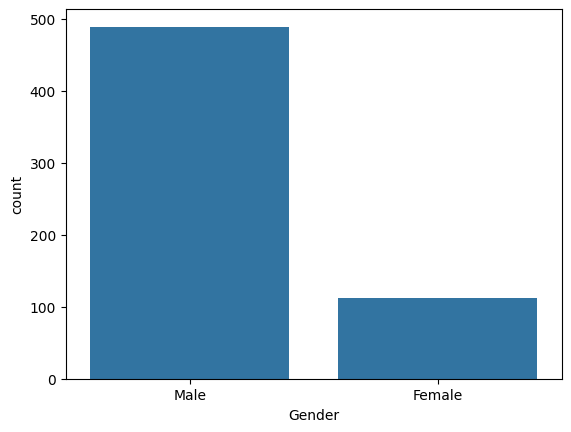

In [ ]:
#Gender
sns.countplot(x = train_df['Gender'])

<Axes: xlabel='Gender', ylabel='count'>

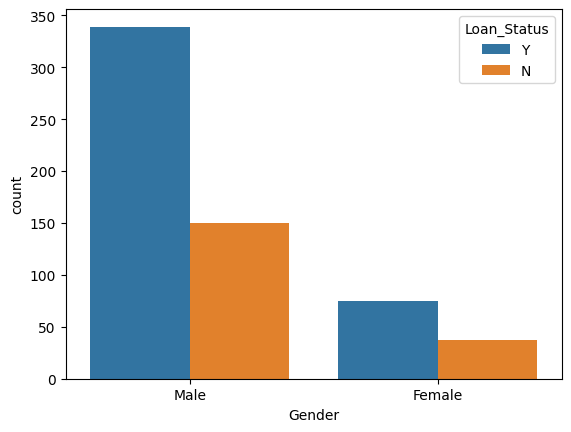

In [ ]:
sns.countplot(x = train_df['Gender'], hue =train_df['Loan_Status'])

<Axes: xlabel='Married', ylabel='count'>

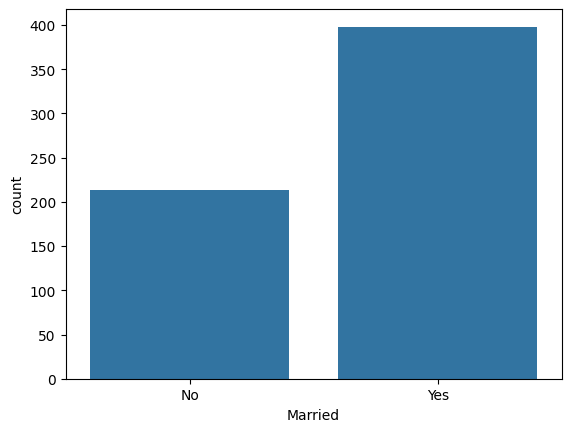

In [ ]:
#Married
sns.countplot(x = train_df['Married'])

<Axes: xlabel='Married', ylabel='count'>

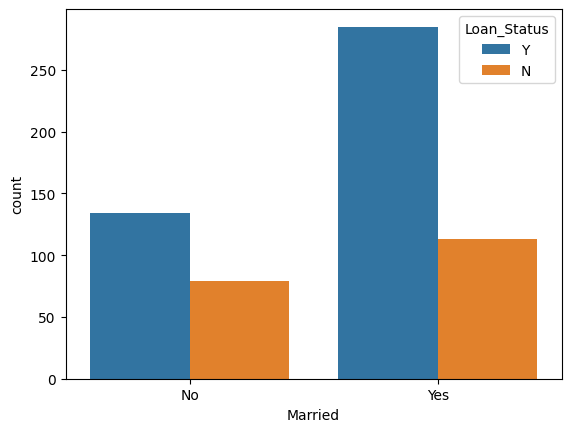

In [ ]:
sns.countplot(x = train_df['Married'], hue = train_df['Loan_Status'])

<Axes: xlabel='Married', ylabel='count'>

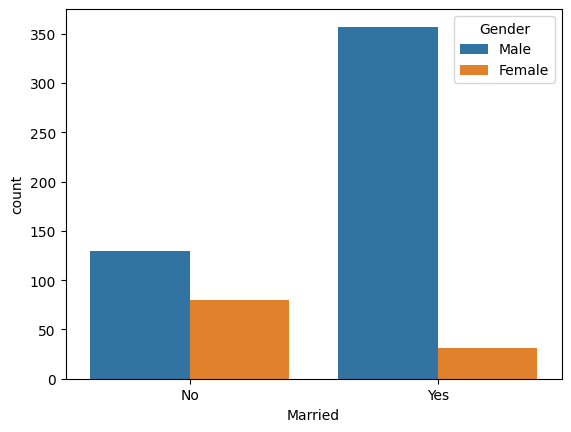

In [ ]:
#Married and gender
sns.countplot(x = train_df['Married'], hue = train_df['Gender'])

In [ ]:
#Dependents
train_df['Dependents'].unique() #should be made into numerical

array(['0', '1', '2', '3+', nan], dtype=object)

<Axes: xlabel='Dependents', ylabel='count'>

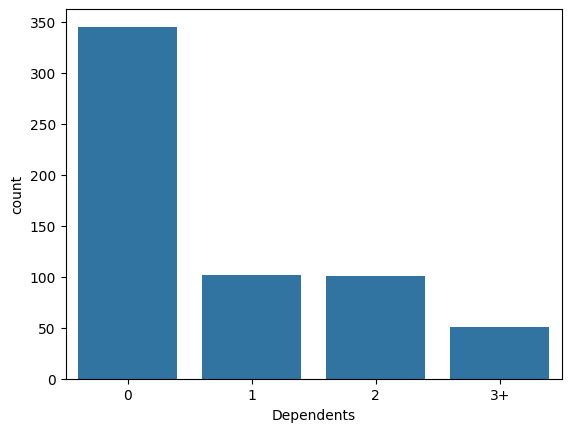

In [ ]:
sns.countplot(x = train_df['Dependents'])

<Axes: xlabel='Dependents', ylabel='count'>

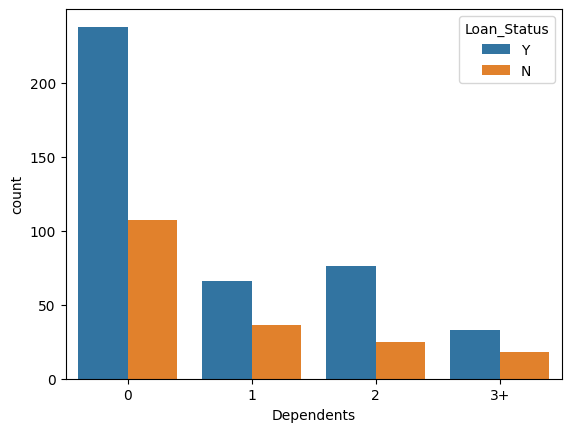

In [ ]:
sns.countplot(x = train_df['Dependents'], hue = train_df['Loan_Status'])

In [ ]:
train_df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
# Education
train_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

<Axes: xlabel='Education', ylabel='count'>

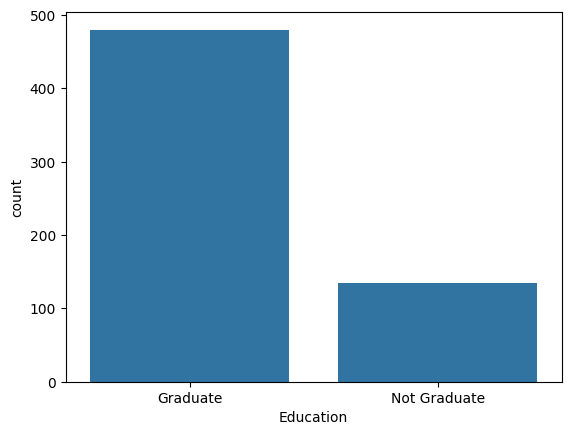

In [ ]:
sns.countplot(x = train_df['Education'])

<Axes: xlabel='Education', ylabel='count'>

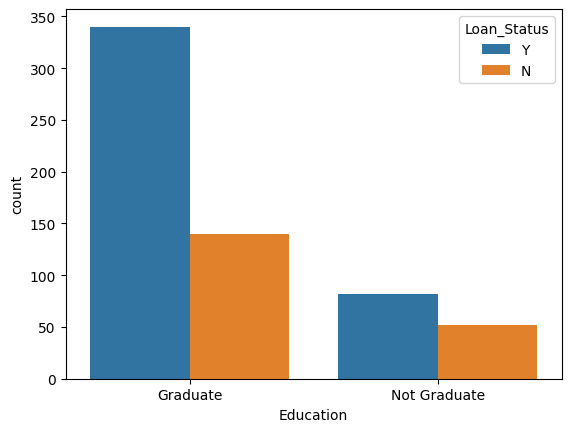

In [ ]:
sns.countplot(x = train_df['Education'], hue = train_df['Loan_Status'])

<Axes: xlabel='Education', ylabel='count'>

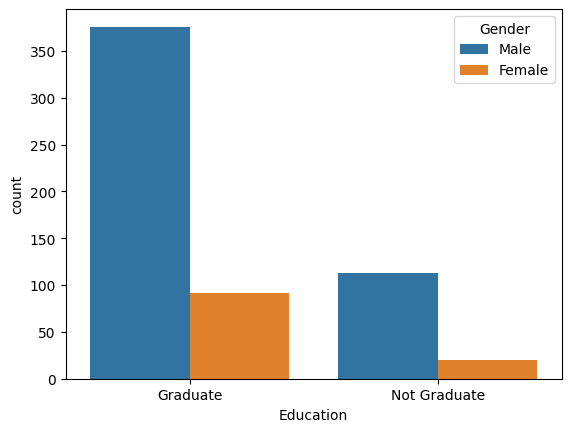

In [ ]:
sns.countplot(x = train_df['Education'], hue = train_df['Gender'])


In [ ]:
# Self_Employed

train_df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

<Axes: xlabel='Self_Employed', ylabel='count'>

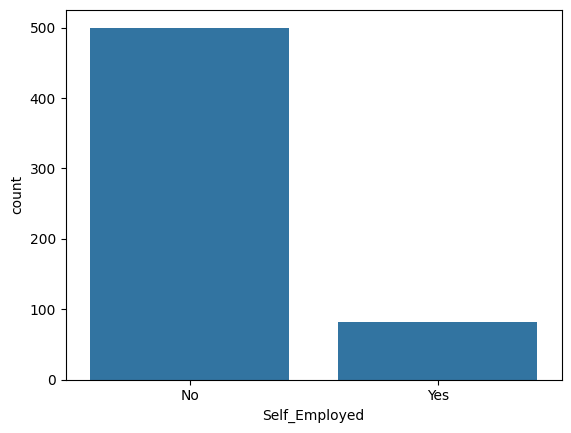

In [ ]:
sns.countplot(x = train_df['Self_Employed'])

<Axes: xlabel='Self_Employed', ylabel='count'>

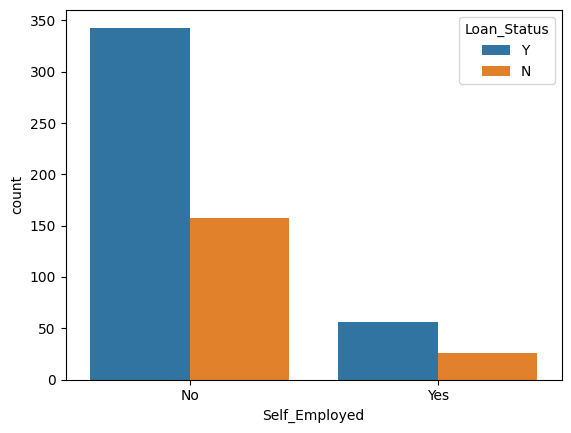

In [ ]:
sns.countplot(x = train_df['Self_Employed'], hue = train_df['Loan_Status'])

In [ ]:
# Property_Area
train_df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

<Axes: xlabel='Property_Area', ylabel='count'>

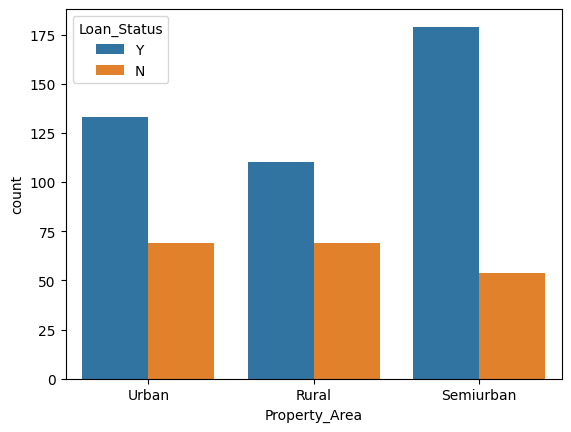

In [ ]:
sns.countplot(x = train_df['Property_Area'], hue = train_df['Loan_Status'])

<Axes: xlabel='Loan_Status', ylabel='count'>

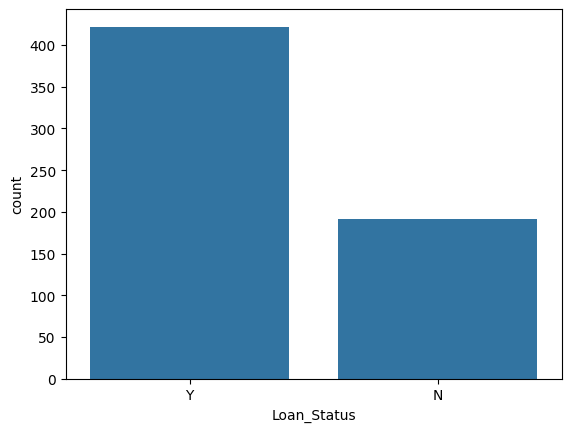

In [ ]:
#Loan_Status
sns.countplot(x = train_df['Loan_Status'])

In [ ]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#Let us analyze the numerical features
# ApplicantIncome

train_df['ApplicantIncome'].value_counts()

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

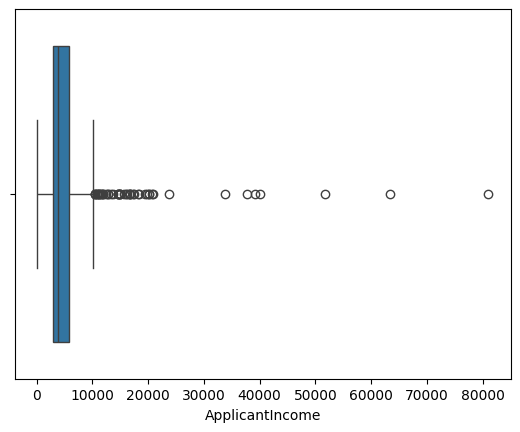

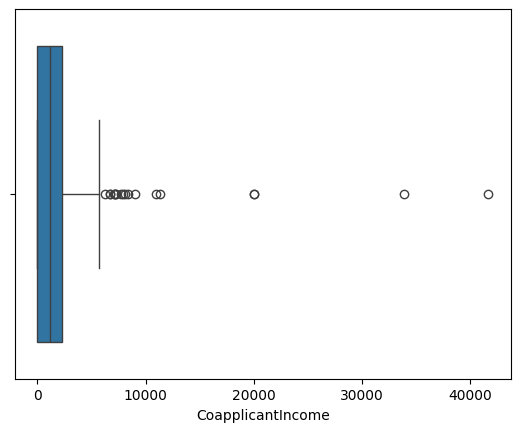

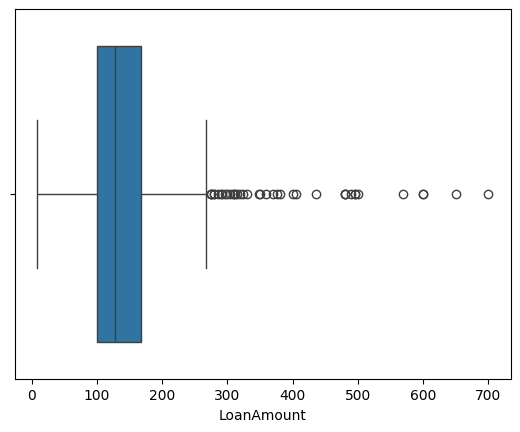

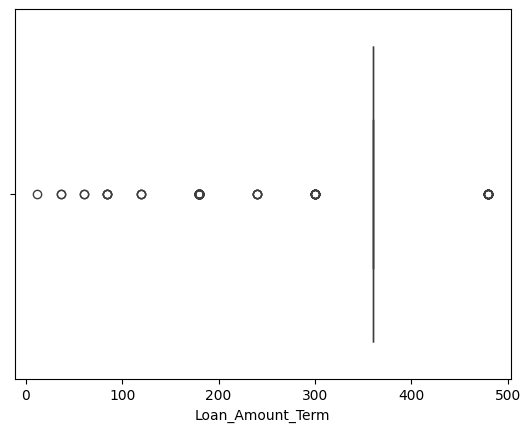

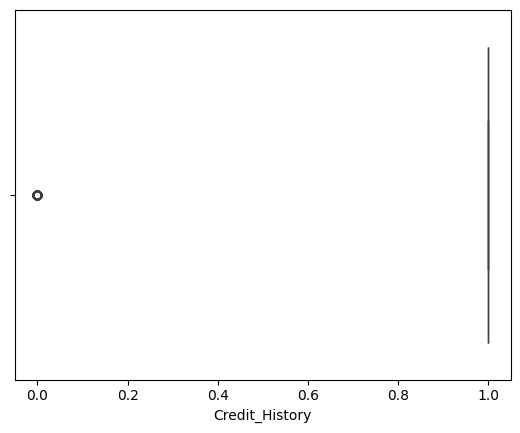

In [ ]:
for feature in numerical_features:
  plt.figure()
  sns.boxplot(x = train_df[feature])


In [ ]:
#Credit History is a discrete numerical feature with two
train_df['Credit_History'].unique()

array([ 1.,  0., nan])

<Axes: xlabel='Credit_History', ylabel='count'>

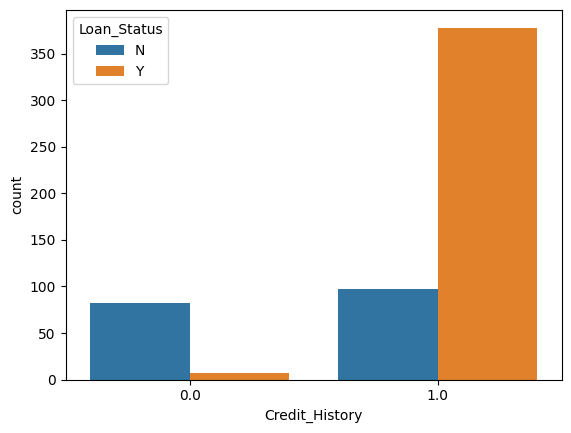

In [ ]:
sns.countplot(x= train_df['Credit_History'], hue = train_df['Loan_Status'])

In [ ]:
#Loan_Amount_Term
train_df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

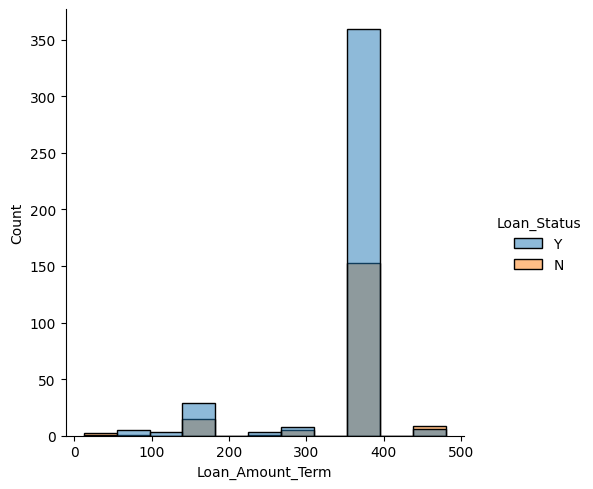

In [ ]:
sns.displot(data=train_df, x='Loan_Amount_Term', hue='Loan_Status')

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

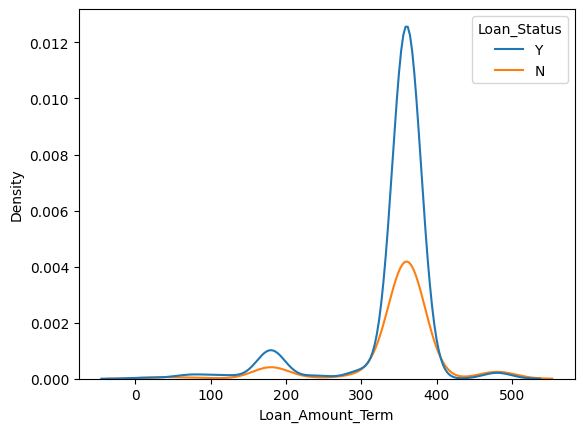

In [ ]:
sns.kdeplot(data=train_df, x='Loan_Amount_Term', hue='Loan_Status')

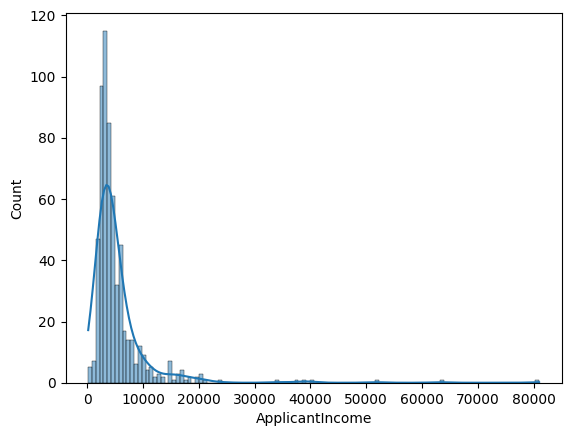

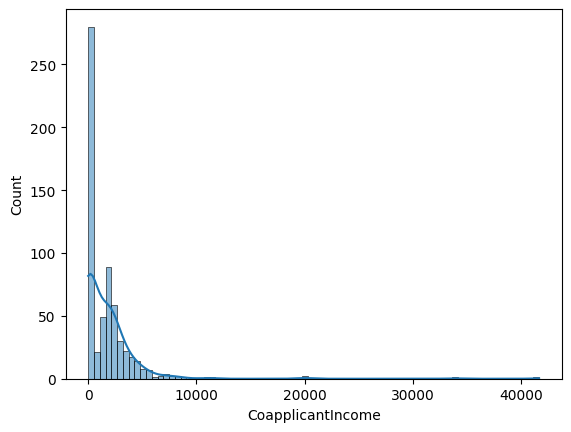

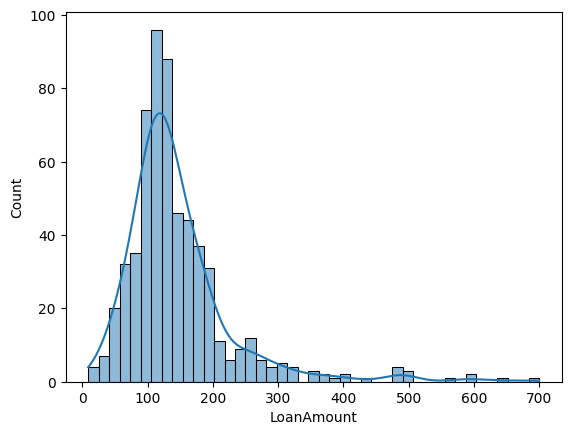

In [ ]:
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for feature in continuous_features:
  plt.figure()
  sns.histplot(data = train_df, x=feature, kde=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


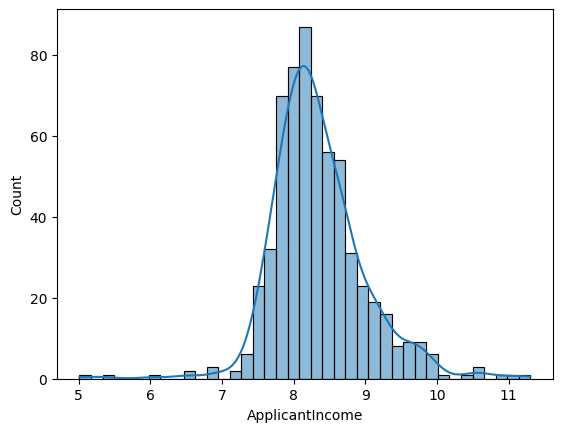

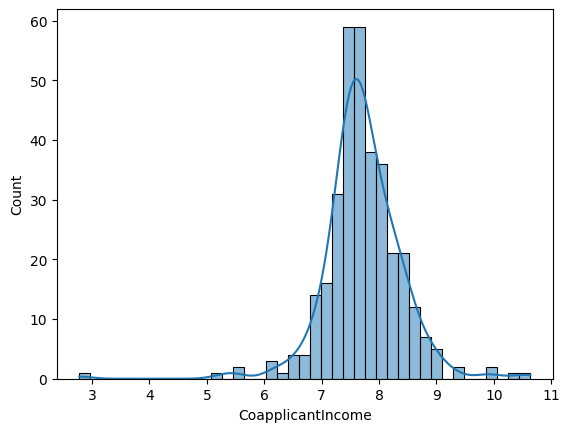

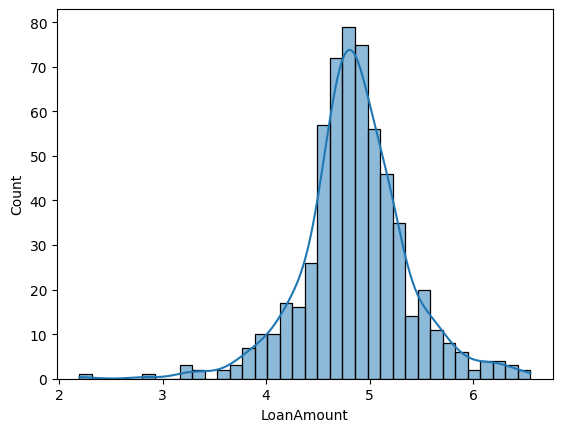

In [ ]:
# all three continuous features are left skewed

for feature in continuous_features:
  df_copy  = train_df.copy()
  df_copy[feature]=np.log(df_copy[feature])
  plt.figure()
  sns.histplot(data = df_copy, x=feature, kde=True)

In [ ]:
#so we can that all the above 3 features were log normally distributed

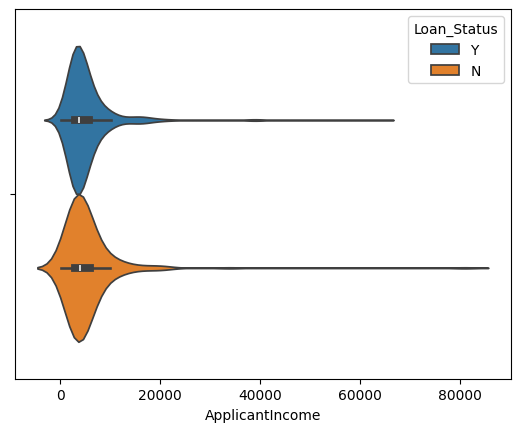

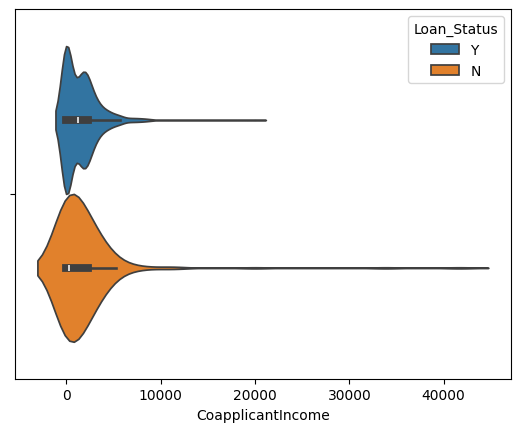

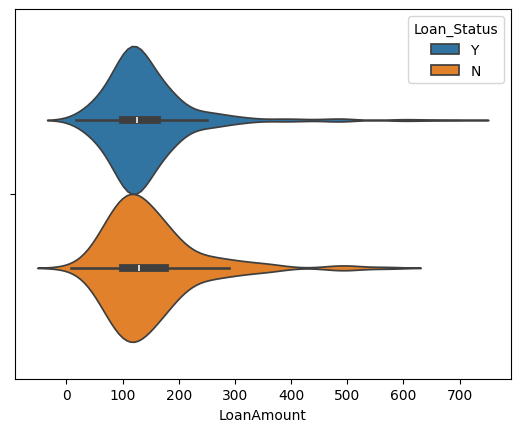

In [ ]:
for feature in continuous_features:
  plt.figure()
  sns.violinplot(data = train_df, x=feature, hue = train_df['Loan_Status'])

#Imputing Missing Values

In [ ]:
features_with_na

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
# Imputing Gender
train_df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [ ]:
gender_mode = train_df['Gender'].mode()[0]
gender_mode

'Male'

In [ ]:
train_df['Gender']  = train_df['Gender'].fillna(gender_mode)
train_df['Gender'].isna().sum()

0

In [ ]:
#Imputing Married
married_mode = train_df['Married'].mode()[0]
married_mode

'Yes'

In [ ]:
train_df['Married']  = train_df['Married'].fillna(married_mode)
train_df['Married'].isna().sum()


0

In [ ]:
#Imputing Dependents
dependents_mode = train_df['Dependents'].mode()[0]
dependents_mode

'0'

In [ ]:
train_df['Dependents']  = train_df['Dependents'].fillna(dependents_mode)
train_df['Dependents'].isna().sum()

0

In [ ]:
#Imputing LoanAmount
LoanAmount_median = train_df['LoanAmount'].median()
LoanAmount_median

128.0

In [ ]:
train_df['LoanAmount']  = train_df['LoanAmount'].fillna(LoanAmount_median)
train_df['LoanAmount'].isna().sum()

0

In [ ]:
#Imputing Loan_Amount_Term
Loan_Amount_Term_median = train_df['Loan_Amount_Term'].median()
print(Loan_Amount_Term_median)
train_df['Loan_Amount_Term']  = train_df['Loan_Amount_Term'].fillna(Loan_Amount_Term_median)
train_df['Loan_Amount_Term'].isna().sum()

360.0


0

In [ ]:
#Imputing Credit_History
Credit_History_median = train_df['Credit_History'].median()
print(Credit_History_median)
train_df['Credit_History']  = train_df['Credit_History'].fillna(Credit_History_median)
train_df['Credit_History'].isna().sum()

1.0


0

In [ ]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# we have three variables that are log normally distributed let us transform them
continuous_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [ ]:
#before we can transform Coapplicant we have to take into consideration that it has zero values
#so let us get a new feature TotalIncome = ApplicantIncome+CoapplicantIncome

train_df['TotalIncome'] = train_df['ApplicantIncome']+train_df['CoapplicantIncome']

In [ ]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [ ]:
#let us drop ApplicantIncome and CoapplicantIncome
train_df.drop(columns = ['ApplicantIncome','CoapplicantIncome'],inplace = True)

In [ ]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


In [ ]:
transform_features = ['TotalIncome','LoanAmount']
for feature in transform_features:
  train_df[feature] = np.log(train_df[feature])

In [ ]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,4.852030,360.0,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4.852030,360.0,1.0,Rural,N,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,4.189655,360.0,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,4.787492,360.0,1.0,Urban,Y,8.505323
4,LP001008,Male,No,0,Graduate,No,4.948760,360.0,1.0,Urban,Y,8.699515


#Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
cols_to_be_encoded = ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
for col in cols_to_be_encoded:
  train_df[col] = le.fit_transform(train_df[col])

In [ ]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0,0,0,4.852030,360.0,1.0,2,1,8.674026
1,LP001003,1,1,1,0,0,4.852030,360.0,1.0,0,0,8.714568
2,LP001005,1,1,0,0,1,4.189655,360.0,1.0,2,1,8.006368
3,LP001006,1,1,0,1,0,4.787492,360.0,1.0,2,1,8.505323
4,LP001008,1,0,0,0,0,4.948760,360.0,1.0,2,1,8.699515


#splitting data in x_train and y_train

In [ ]:
#drop Loan_ID
train_df.drop(columns = 'Loan_ID', inplace = True)

In [ ]:
x_train = train_df.drop(columns = 'Loan_Status')
y_train = train_df['Loan_Status']

In [ ]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,0,0,0,4.852030,360.0,1.0,2,8.674026
1,1,1,1,0,0,4.852030,360.0,1.0,0,8.714568
2,1,1,0,0,1,4.189655,360.0,1.0,2,8.006368
3,1,1,0,1,0,4.787492,360.0,1.0,2,8.505323
4,1,0,0,0,0,4.948760,360.0,1.0,2,8.699515


In [ ]:
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [ ]:
x_train.to_csv('x_train.csv')
y_train.to_csv('y_train.csv')

#Performing Feature Engineering on Test Data

In [185]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [186]:
null_percent_test = test_df.isna().sum()/test_df.shape[0]*100
null_percent_test

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [187]:
features_with_na_test = null_percent_test[null_percent_test>0].index.to_list()
features_with_na_test

['Gender',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [188]:
test_df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [189]:
gender_mode_test = test_df['Gender'].mode()[0]
print(gender_mode_test)
test_df['Gender'] = test_df['Gender'].fillna(gender_mode_test)
test_df['Gender'].isna().sum()

Male


0

In [190]:
test_df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [192]:
Dependents_mode_test = test_df['Dependents'].mode()[0]
print(Dependents_mode_test)
test_df['Dependents'] = test_df['Dependents'].fillna(Dependents_mode_test)
test_df['Dependents'].isna().sum()

0


0

In [193]:
test_df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [194]:
Self_Employed_mode_test = test_df['Self_Employed'].mode()[0]
print(Self_Employed_mode_test)
test_df['Self_Employed'] = test_df['Self_Employed'].fillna(Self_Employed_mode_test)
test_df['Self_Employed'].isna().sum()

No


0

In [197]:
#Imputing LoanAmount
LoanAmount_median_test = test_df['LoanAmount'].median()
print(LoanAmount_median_test)
test_df['LoanAmount']  = test_df['LoanAmount'].fillna(LoanAmount_median_test)
test_df['LoanAmount'].isna().sum()

125.0


0

In [195]:
#Imputing Loan_Amount_Term
Loan_Amount_Term_median_test = test_df['Loan_Amount_Term'].median()
print(Loan_Amount_Term_median_test)
test_df['Loan_Amount_Term']  = test_df['Loan_Amount_Term'].fillna(Loan_Amount_Term_median_test)
test_df['Loan_Amount_Term'].isna().sum()

360.0


0

In [196]:
#Imputing Credit_History
Credit_History_median_test = test_df['Credit_History'].median()
print(Credit_History_median_test)
test_df['Credit_History']  = test_df['Credit_History'].fillna(Credit_History_median_test)
test_df['Credit_History'].isna().sum()

1.0


0

In [198]:
test_df['TotalIncome'] = test_df['ApplicantIncome']+test_df['CoapplicantIncome']

In [199]:
test_df.drop(columns = ['ApplicantIncome','CoapplicantIncome'],inplace = True)

In [201]:
transform_features = ['TotalIncome','LoanAmount']
for feature in transform_features:
  test_df[feature] = np.log(test_df[feature])

In [205]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,4.700480,360.0,1.0,Urban,8.651724
1,LP001022,Male,Yes,1,Graduate,No,4.836282,360.0,1.0,Urban,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5.337538,360.0,1.0,Urban,8.824678
3,LP001035,Male,Yes,2,Graduate,No,4.605170,360.0,1.0,Urban,8.494129
4,LP001051,Male,No,0,Not Graduate,No,4.356709,360.0,1.0,Urban,8.094378


In [206]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [209]:
cols_to_be_encoded = ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [210]:
for col in cols_to_be_encoded:
  test_df[col] = le.fit_transform(test_df[col])

In [211]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,LP001015,1,1,0,0,0,4.700480,360.0,1.0,2,8.651724
1,LP001022,1,1,1,0,0,4.836282,360.0,1.0,2,8.428581
2,LP001031,1,1,2,0,0,5.337538,360.0,1.0,2,8.824678
3,LP001035,1,1,2,0,0,4.605170,360.0,1.0,2,8.494129
4,LP001051,1,0,0,1,0,4.356709,360.0,1.0,2,8.094378


In [212]:
x_test = test_df.drop(columns = ['Loan_ID'])
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,1,0,0,0,4.700480,360.0,1.0,2,8.651724
1,1,1,1,0,0,4.836282,360.0,1.0,2,8.428581
2,1,1,2,0,0,5.337538,360.0,1.0,2,8.824678
3,1,1,2,0,0,4.605170,360.0,1.0,2,8.494129
4,1,0,0,1,0,4.356709,360.0,1.0,2,8.094378


In [213]:
x_test.to_csv('x_test.csv')